# **Data Cleaning & Exploratory Data Analysis (EDA) of Cafe Sales Data**

**Downloaded Dataset from Kaggle** - https://www.kaggle.com/datasets/asmaelnaml/cafe-sales

**Data Cleaning** –
identifying and handling missing or invalid values, fixing data types, and creating useful features

**Exploratory Data Analysis (EDA)** – using visualizations to understand trends in customer behavior, sales patterns, and payment preferences


## **Part 1: Data Cleaning**

In this first section, I focused on cleaning and preparing the dataset for analysis. This included:

- Handling missing values
- Fixing data types
- Replacing invalid strings like "ERROR" or "UNKNOWN"
- Creating new columns from the date field for later trend analysis

By the end of this phase, I had a cleaned and structured dataset ready for exploratory analysis.


### Load and Preview the Dataset

I started by loading the `cafe_sales.csv` file.

This dataset contains raw transaction data from a cafe, including dates, customer names, payment methods, and purchase totals. Our goal in this project is to clean the dataset and prepare it for further analysis or modeling.


In [15]:
from google.colab import files
uploaded = files.upload()  # This opens a file picker

Saving cafe_sales_dirty.csv to cafe_sales_dirty (2).csv


In [16]:
import pandas as pd

df = pd.read_csv('cafe_sales_dirty.csv')

# Preview the data
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [17]:
df.dtypes

,0
Transaction ID,object
Item,object
Quantity,object
Price Per Unit,object
Total Spent,object
Payment Method,object
Location,object
Transaction Date,object


### Converting and Cleaning Numeric Columns

Some numeric columns were stored as object types due to invalid values like `"ERROR"`.

I converted the following columns to numeric using `pd.to_numeric(..., errors='coerce')`, which replaced invalid entries with `NaN`:
- Quantity
- Price Per Unit
- Total Spent

I then imputed missing values using the **median** to maintain a stable distribution.


In [18]:
# Convert to numeric and turn errors into NaN
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

In [19]:
df.dtypes

,0
Transaction ID,object
Item,object
Quantity,float64
Price Per Unit,float64
Total Spent,float64
Payment Method,object
Location,object
Transaction Date,object


In [20]:
df.isnull().sum()

,0
Transaction ID,0
Item,333
Quantity,479
Price Per Unit,533
Total Spent,502
Payment Method,2579
Location,3265
Transaction Date,159


In [21]:
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())
df['Price Per Unit'] = df['Price Per Unit'].fillna(df['Price Per Unit'].median())
df['Total Spent'] = df['Total Spent'].fillna(df['Total Spent'].median())

In [22]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,8.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2.0,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3.0,3.0,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3.0,3.0,3.0,Digital Wallet,NaN,2023-12-02


### Handling Categorical Columns

I cleaned and imputed missing values in the following categorical columns:

- **Item**: Filled using the mode (most common item).
- **Payment Method**: Filled using the mode.
- **Location**: Filled with `"Unknown"` since it's a contextual placeholder.

Before filling, I also replaced invalid entries like `"ERROR"` and `"UNKNOWN"` with `NaN` for proper handling.


In [23]:
df.replace(['ERROR', 'UNKNOWN'], pd.NA, inplace=True)

In [24]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,8.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,<NA>,<NA>,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2.0,2.0,4.0,NaN,<NA>,2023-08-30
9996,TXN_9659401,NaN,3.0,3.0,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3.0,3.0,3.0,Digital Wallet,NaN,2023-12-02


In [25]:
df['Item'] = df['Item'].fillna(df['Item'].mode()[0])
df['Payment Method'] = df['Payment Method'].fillna(df['Payment Method'].mode()[0])
df['Location'] = df['Location'].fillna('Unknown')

In [26]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,8.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,Unknown,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [27]:
df.isnull().sum()

,0
Transaction ID,0
Item,0
Quantity,0
Price Per Unit,0
Total Spent,0
Payment Method,0
Location,0
Transaction Date,460


In [28]:
df.dtypes

,0
Transaction ID,object
Item,object
Quantity,float64
Price Per Unit,float64
Total Spent,float64
Payment Method,object
Location,object
Transaction Date,object


### Cleaning the `Transaction Date` Column

The `Transaction Date` was initially stored as an object type. Therefore, I:

1. Converted it into a proper `datetime` format using `pd.to_datetime()`, coercing errors into `NaT`.
2. Handled missing dates by filling with the median date.
3. Created new time-based features:
   - Day of Week
   - Month
   - Year

These will support trend analysis and future modeling tasks.


In [29]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

In [30]:
df.dtypes['Transaction Date']

dtype('<M8[ns]')

In [31]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,8.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,Unknown,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Digital Wallet,Unknown,2023-08-30
9996,TXN_9659401,Juice,3.0,3.0,3.0,Digital Wallet,Unknown,2023-06-02
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,Unknown,2023-03-02
9998,TXN_7695629,Cookie,3.0,3.0,3.0,Digital Wallet,Unknown,2023-12-02


In [32]:
df['Transaction Date'].isnull().sum()

np.int64(460)

In [33]:
median_date = df['Transaction Date'].median()
df['Transaction Date'] = df['Transaction Date'].fillna(median_date)

In [34]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,8.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,Unknown,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Digital Wallet,Unknown,2023-08-30
9996,TXN_9659401,Juice,3.0,3.0,3.0,Digital Wallet,Unknown,2023-06-02
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,Unknown,2023-03-02
9998,TXN_7695629,Cookie,3.0,3.0,3.0,Digital Wallet,Unknown,2023-12-02


In [35]:
df['Transaction Date'].isnull().sum()

np.int64(0)

In [36]:
# Create useful date features
df['Day of Week'] = df['Transaction Date'].dt.day_name()
df['Month'] = df['Transaction Date'].dt.month
df['Year'] = df['Transaction Date'].dt.year

In [37]:
df.columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date', 'Day of Week',
       'Month', 'Year'],
      dtype='object')

In [38]:
df.head(3)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Day of Week,Month,Year
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,Friday,9,2023
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,Tuesday,5,2023
2,TXN_4271903,Cookie,4.0,1.0,8.0,Credit Card,In-store,2023-07-19,Wednesday,7,2023


### Final Sanity Checks and Save

Before moving into Exploratory Data Analysis (EDA), I:

- Removed duplicate rows (if any)
- Re-checked that there are no missing values
- Verified data types
- Saved the cleaned dataset as `cafe_sales_cleaned.csv` for future use


In [39]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [40]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Day of Week,Month,Year
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,Friday,9,2023
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,Tuesday,5,2023
2,TXN_4271903,Cookie,4.0,1.0,8.0,Credit Card,In-store,2023-07-19,Wednesday,7,2023
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,Unknown,2023-04-27,Thursday,4,2023
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,Sunday,6,2023
...,...,...,...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Digital Wallet,Unknown,2023-08-30,Wednesday,8,2023
9996,TXN_9659401,Juice,3.0,3.0,3.0,Digital Wallet,Unknown,2023-06-02,Friday,6,2023
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,Unknown,2023-03-02,Thursday,3,2023
9998,TXN_7695629,Cookie,3.0,3.0,3.0,Digital Wallet,Unknown,2023-12-02,Saturday,12,2023


In [41]:
# Sanity Check
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              10000 non-null  object        
 2   Quantity          10000 non-null  float64       
 3   Price Per Unit    10000 non-null  float64       
 4   Total Spent       10000 non-null  float64       
 5   Payment Method    10000 non-null  object        
 6   Location          10000 non-null  object        
 7   Transaction Date  10000 non-null  datetime64[ns]
 8   Day of Week       10000 non-null  object        
 9   Month             10000 non-null  int32         
 10  Year              10000 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), object(5)
memory usage: 781.4+ KB


,0
Transaction ID,0
Item,0
Quantity,0
Price Per Unit,0
Total Spent,0
Payment Method,0
Location,0
Transaction Date,0
Day of Week,0
Month,0


In [42]:
#mount google drive in colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
# Save to Google Drive inside 'MyDrive'
df.to_csv('/content/drive/MyDrive/cafe_sales_cleaned.csv', index=False)

In [ ]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Day of Week,Month,Year
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,Friday,9,2023
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,Tuesday,5,2023
2,TXN_4271903,Cookie,4.0,1.0,8.0,Credit Card,In-store,2023-07-19,Wednesday,7,2023
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,Unknown,2023-04-27,Thursday,4,2023
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,Sunday,6,2023
...,...,...,...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Digital Wallet,Unknown,2023-08-30,Wednesday,8,2023
9996,TXN_9659401,Juice,3.0,3.0,3.0,Digital Wallet,Unknown,2023-06-02,Friday,6,2023
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,Unknown,2023-03-02,Thursday,3,2023
9998,TXN_7695629,Cookie,3.0,3.0,3.0,Digital Wallet,Unknown,2023-12-02,Saturday,12,2023


In [44]:
from google.colab import files
files.download('/content/drive/MyDrive/cafe_sales_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Part 2: Exploratory Data Analysis (EDA)**

This section is divided into three main themes: **Sales Insights**, **Time-Based Patterns**, and **Customer Behavior**. Each theme explores two key business questions using visual analysis.

---

#### **1. Sales Insights**

1.1. **What are the most frequently sold items?**  
   - Helps identify high-demand products

1.2. **Which items generate the most total revenue?**  
   - Reveals which products are the most profitable overall

1.3. **Do high-quantity purchases always lead to higher total spend per item?**
   - Reveals if certain items drive high spend even at low quantities

---

#### **2. Time-Based Patterns**

2.1. **Which days of the week have the highest sales activity?**  
   - Helps understand customer behavior across the week

2.2. **How do monthly sales compare?**  
   - Provides insight into seasonal trends or demand shifts

2.3. **Do payment preferences change across weekdays vs weekends?**
   - Shows if cash usage spikes on weekends or digital wallets dominate weekdays.

2.4. **How do different payment methods contribute to monthly sales trends?**
   - Identifies seasonal patterns and which payment method drives growth during specific months.

---

#### **3. Customer Behavior**

3.1. **What are the most commonly used payment methods?**  
   - Useful for operational and customer experience planning

3.2. **Do customers spend differently depending on payment method?**  
   - Explores whether payment method influences average spend

3.3. **Does location (In-store vs Takeaway) influence spend per payment type?**

3.4. **How do top revenue-generating items perform across months with different payment types?**
   - Reveals seasonality + payment trends for bestsellers

---

#### 1.1. What are the most frequently sold items?

This chart shows the cafe’s most popular items based on **sales volume** — in other words, how often each item appears in the dataset.

Unlike revenue-based analysis, this focuses only on **frequency**, giving insight into customer preferences and demand patterns.

Understanding top-selling items is useful for inventory planning and daily preparation.


In [45]:
df.shape

(10000, 11)

In [46]:
# View all unique items
unique_items = df['Item'].unique()
print(unique_items)

['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'Juice' 'Sandwich' 'Tea']


/tmp/ipython-input-4224867081.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_sold_items.values, y=most_sold_items.index, palette='crest')


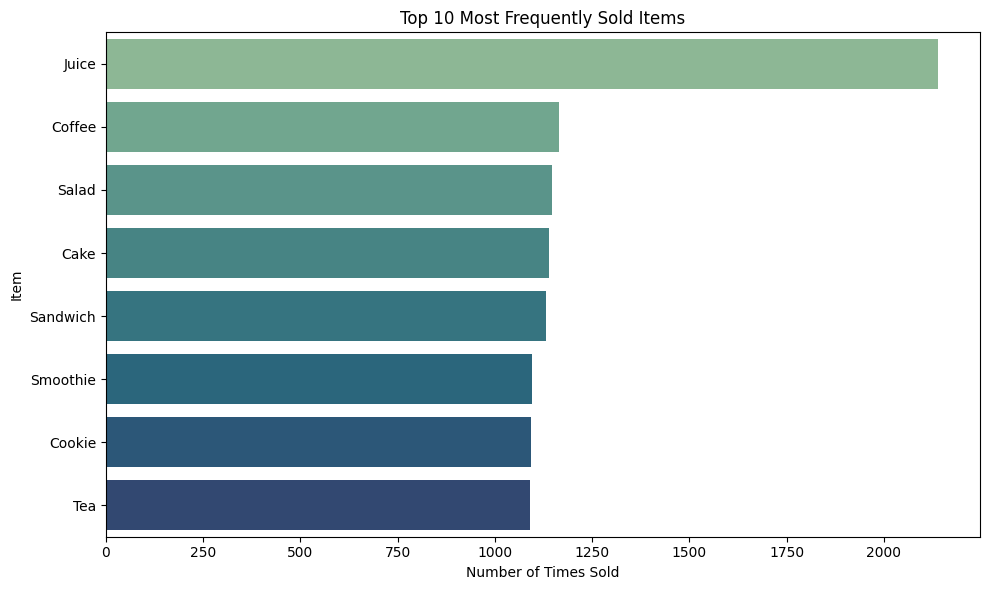

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count top 10 most sold items
most_sold_items = df['Item'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=most_sold_items.values, y=most_sold_items.index, palette='crest')
plt.title('Top 10 Most Frequently Sold Items')
plt.xlabel('Number of Times Sold')
plt.ylabel('Item')
plt.tight_layout()
plt.show()


#### 1.2. Which items generate the most total revenue?

While some items may be frequently sold, they may not necessarily bring in the most money.



In [48]:
# Create a new column:
df['Item Revenue'] = df['Price Per Unit'] * df['Quantity']

# Group by Item and calculate total revenue
revenue_by_item = df.groupby('Item')['Item Revenue'].sum().sort_values(ascending=False).head(10)

In [49]:
df.columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date', 'Day of Week',
       'Month', 'Year', 'Item Revenue'],
      dtype='object')

In [50]:
revenue_by_item

,Item Revenue
Item,
Juice,19157.0
Salad,16959.0
Sandwich,13538.0
Smoothie,13218.0
Cake,10401.0
Coffee,7261.0
Tea,5296.5
Cookie,3651.0



This bar chart highlights the top 10 items that have generated the most total revenue for the café.

This helps identify the café’s highest-earning products — a valuable insight for promotions and inventory planning.


/tmp/ipython-input-743069182.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_item.values, y=revenue_by_item.index, palette='mako')


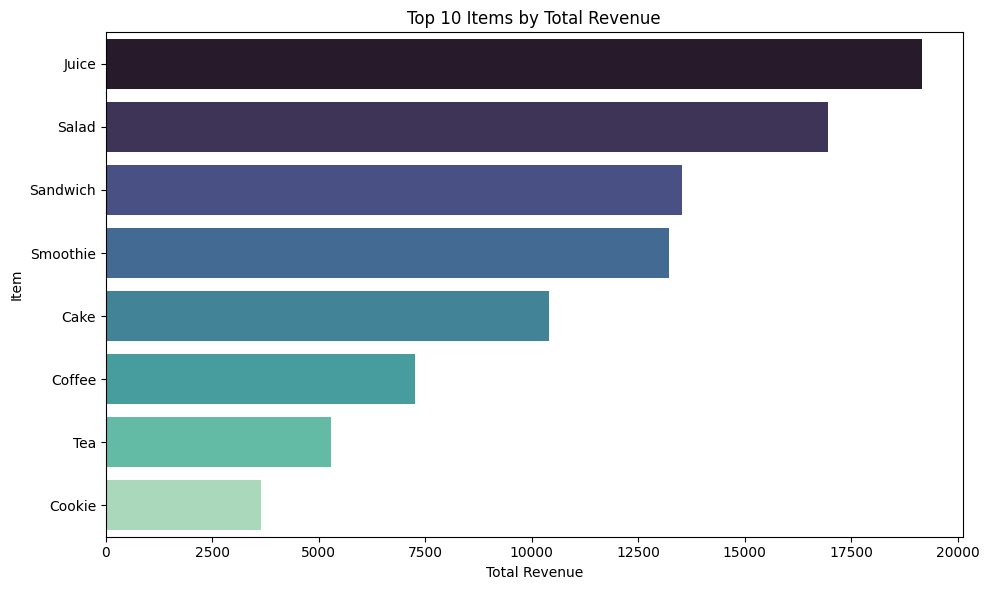

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x=revenue_by_item.values, y=revenue_by_item.index, palette='mako')
plt.title('Top 10 Items by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Item')
plt.tight_layout()
plt.show()

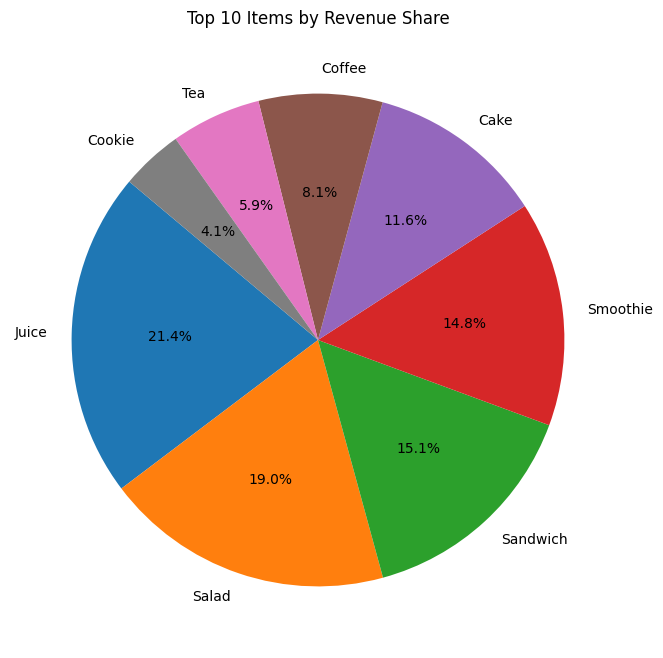

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.pie(revenue_by_item.values, labels=revenue_by_item.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Items by Revenue Share')
plt.show()

#### 1.3. Do high-quantity purchases always lead to higher total spend per item?

Bivariate: Quantity vs. Total Spent by Item



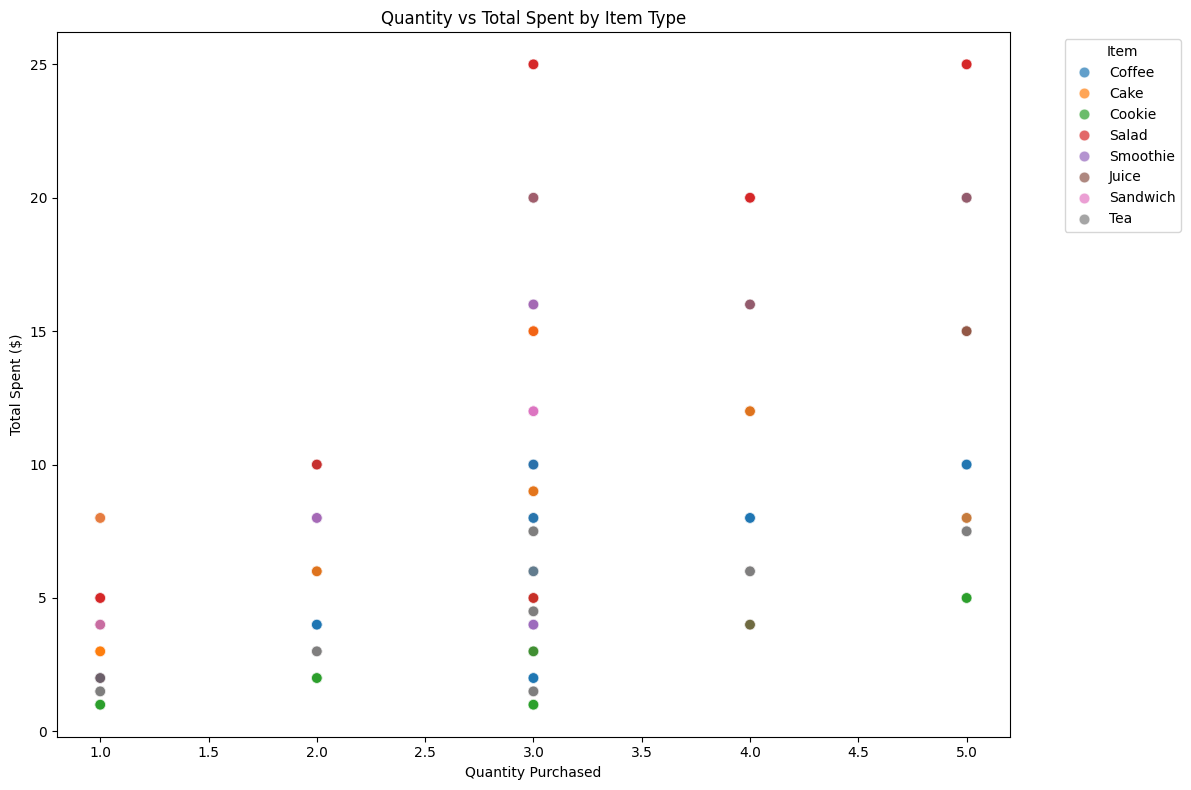

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='Quantity',
    y='Total Spent',
    hue='Item',
    palette='tab10',
    s=60,
    alpha=0.7
)
plt.title('Quantity vs Total Spent by Item Type')
plt.xlabel('Quantity Purchased')
plt.ylabel('Total Spent ($)')
plt.legend(title='Item', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Insight: Reveals if certain items drive high spend even at low quantities (e.g., Smoothies vs Cookies).

#### 2.1 Which days of the week have the highest sales activity?

Using the `Transaction Date` column, I created a new column called `Day of Week` during the cleaning phase.

Here, I grouped transactions by day and summed the total sales. This chart helps identify which days bring in the most revenue — useful for scheduling, staffing, and marketing campaigns.

Consistent spikes on certain days could suggest customer routines or promotional opportunities.


In [55]:
import matplotlib.pyplot as plt

# Group and sum total spent by day of the week
sales_by_day = df.groupby('Day of Week')['Total Spent'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

sales_by_day

,Total Spent
Day of Week,
Monday,12161.5
Tuesday,11957.0
Wednesday,11641.0
Thursday,12362.5
Friday,12264.0
Saturday,11976.0
Sunday,16417.5


/tmp/ipython-input-1426791270.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette='rocket')


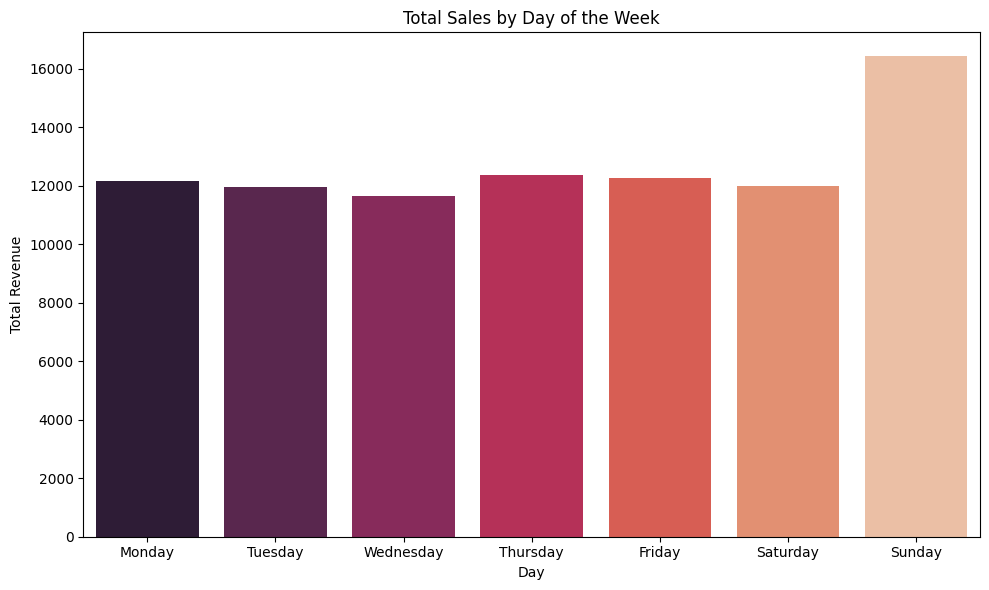

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette='rocket')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

#### 2.2 How do monthly sales compare?

To understand seasonal trends or monthly performance, I grouped transactions by the `Month` column (extracted earlier from the transaction date).

This chart visualizes total cafe revenue across the months in the dataset. Patterns here could reveal high-traffic seasons, slow periods, or opportunities for special promotions.


/tmp/ipython-input-645141789.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_labels[:len(sales_by_month)], y=sales_by_month.values, palette='flare')


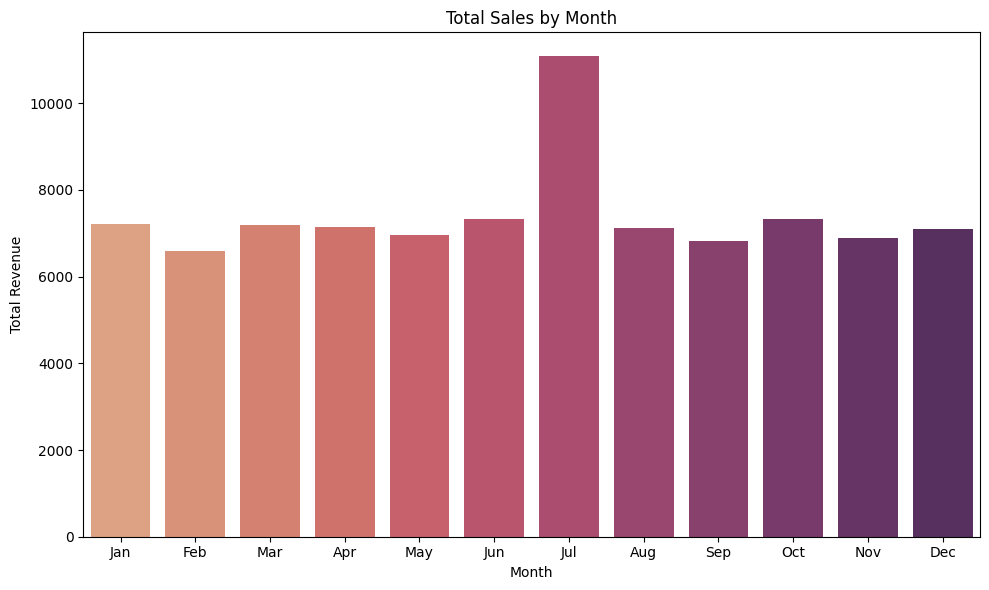

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and sum total spent by month
sales_by_month = df.groupby('Month')['Total Spent'].sum().sort_index()

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=month_labels[:len(sales_by_month)], y=sales_by_month.values, palette='flare')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

#### 2.3 Do payment preferences change across weekdays vs weekends?

Bivariate: Sales by Day of Week and Payment Method



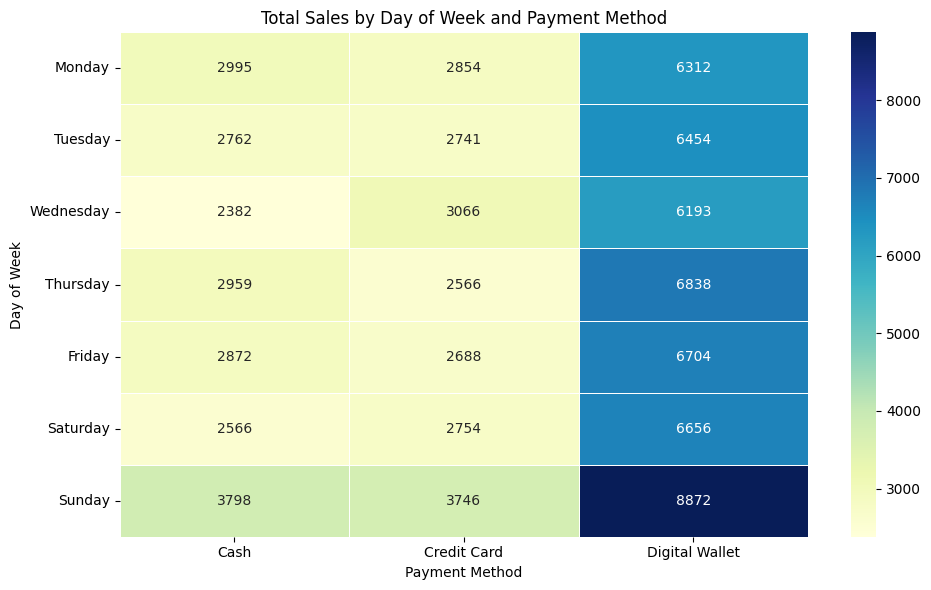

In [58]:
# Pivot table for heatmap
heatmap_data = df.groupby(['Day of Week', 'Payment Method'])['Total Spent'].sum().unstack(fill_value=0)
# Reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(day_order)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5)
plt.title('Total Sales by Day of Week and Payment Method')
plt.ylabel('Day of Week')
plt.xlabel('Payment Method')
plt.tight_layout()
plt.show()

In [59]:
heatmap_data

Payment Method,Cash,Credit Card,Digital Wallet
Day of Week,,,
Monday,2995.0,2854.0,6312.5
Tuesday,2761.5,2741.0,6454.5
Wednesday,2381.5,3066.5,6193.0
Thursday,2959.0,2565.5,6838.0
Friday,2872.5,2688.0,6703.5
Saturday,2566.0,2753.5,6656.5
Sunday,3798.5,3746.5,8872.5


Insight: Shows if cash usage spikes on weekends or digital wallets dominate weekdays.

#### 2.4 How do different payment methods contribute to monthly sales trends?
Multivariate: Monthly Sales Trend by Payment Method

/tmp/ipython-input-3019850206.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


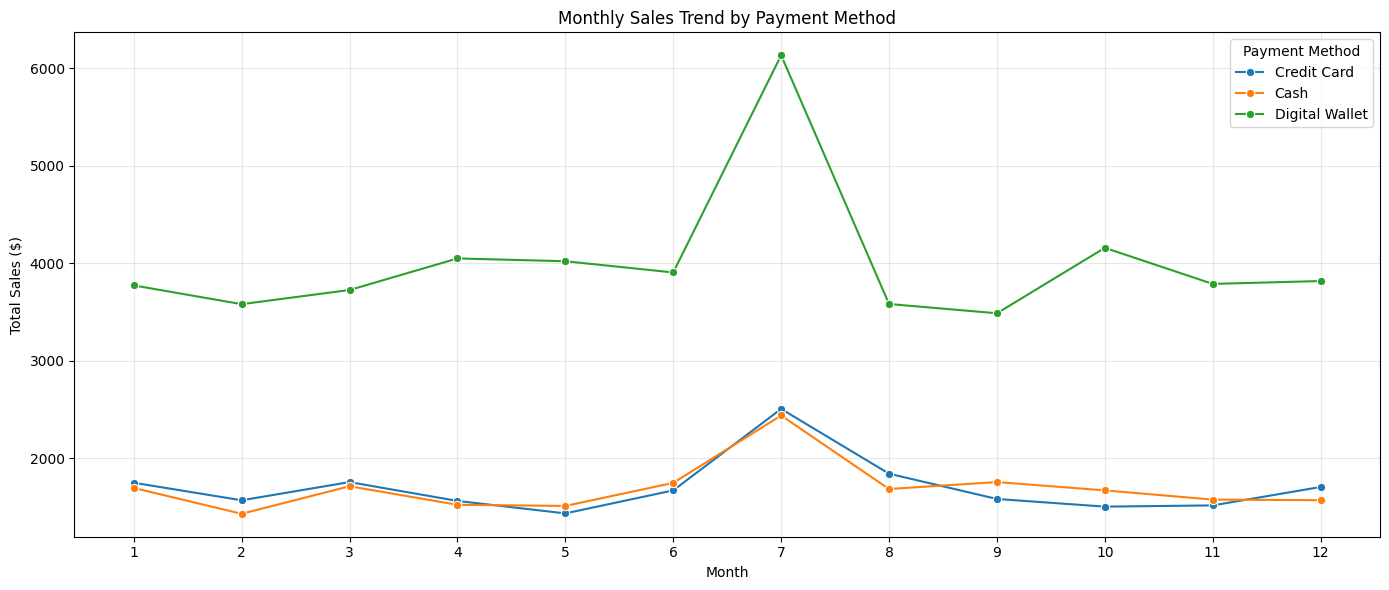

In [60]:
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=df,
    x='Month',
    y='Total Spent',
    hue='Payment Method',
    estimator='sum',
    ci=None,
    marker='o'
)
plt.title('Monthly Sales Trend by Payment Method')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(range(1, 13))
plt.legend(title='Payment Method')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Insight: Identifies seasonal patterns and which payment method drives growth during specific months.

#### 3.1 What are the most commonly used payment methods?

This chart shows how customers typically pay at the cafe — whether via card, cash, or other methods.

Understanding popular payment types is useful for day-to-day operations (e.g., keeping enough change) and enhancing the customer experience (e.g., enabling digital wallets).


/tmp/ipython-input-2211893837.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.values, y=payment_counts.index, palette='pastel')


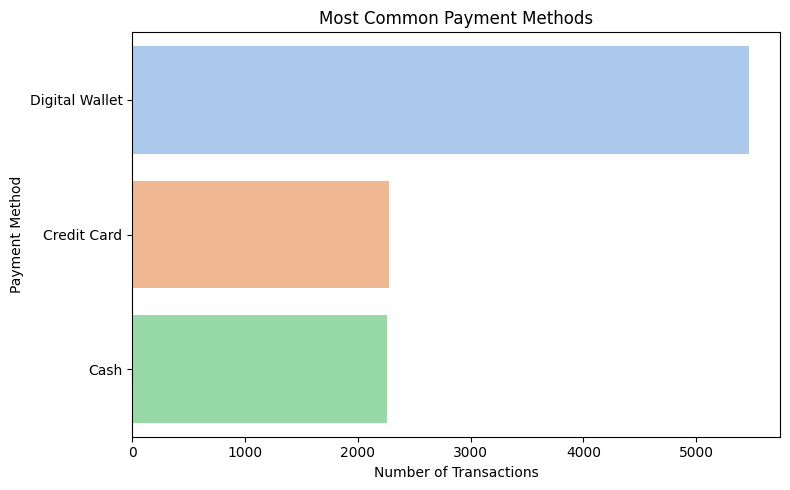

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count each payment method
payment_counts = df['Payment Method'].value_counts()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=payment_counts.values, y=payment_counts.index, palette='pastel')
plt.title('Most Common Payment Methods')
plt.xlabel('Number of Transactions')
plt.ylabel('Payment Method')
plt.tight_layout()
plt.show()

In [62]:
payment_counts

,count
Payment Method,
Digital Wallet,5469
Credit Card,2273
Cash,2258


#### 3.2 Do customers spend differently depending on payment method?

Here, I compared the **average transaction value** across different payment methods.

This can offer insight into customer behavior — for example, card or mobile payments might be linked to higher spending than cash.

Such patterns could help inform marketing, payment system decisions, and even loyalty program targeting.


/tmp/ipython-input-2821310303.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_spend_by_method.values, y=avg_spend_by_method.index, palette='coolwarm')


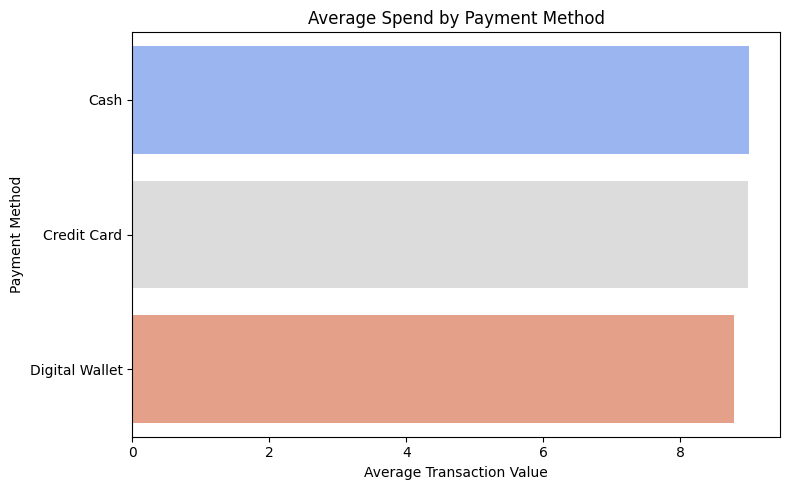

In [63]:
# Calculate average spend by payment method
avg_spend_by_method = df.groupby('Payment Method')['Total Spent'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=avg_spend_by_method.values, y=avg_spend_by_method.index, palette='coolwarm')
plt.title('Average Spend by Payment Method')
plt.xlabel('Average Transaction Value')
plt.ylabel('Payment Method')
plt.tight_layout()
plt.show()


In [64]:
avg_spend_by_method

,Total Spent
Payment Method,
Cash,9.005314
Credit Card,8.981522
Digital Wallet,8.782319


#### 3.3 Does location (In-store vs Takeaway) influence spend per payment type?

Bivariate: Average Spend by Payment Method and Location


/tmp/ipython-input-3007197307.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


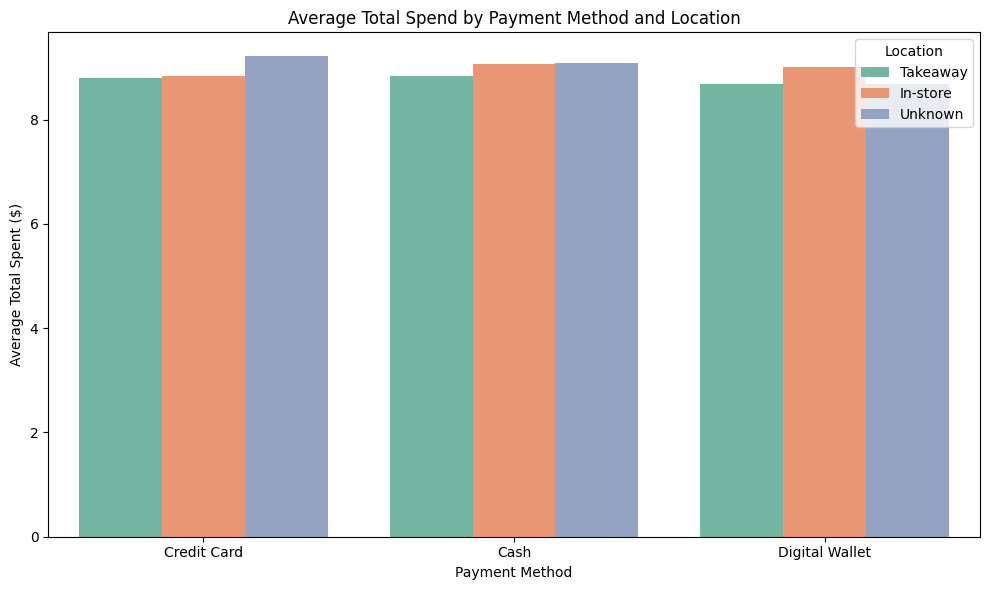

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x='Payment Method',
    y='Total Spent',
    hue='Location',
    ci=None,
    palette='Set2'
)
plt.title('Average Total Spend by Payment Method and Location')
plt.xlabel('Payment Method')
plt.ylabel('Average Total Spent ($)')
plt.legend(title='Location')
plt.tight_layout()
plt.show()

Insight: E.g., Digital Wallet users may spend more in-store than for takeaway.

#### 3.4 How do top revenue-generating items perform across months with different payment types?

Multivariate: Item Revenue by Month and Payment Method (Facet Grid)

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/

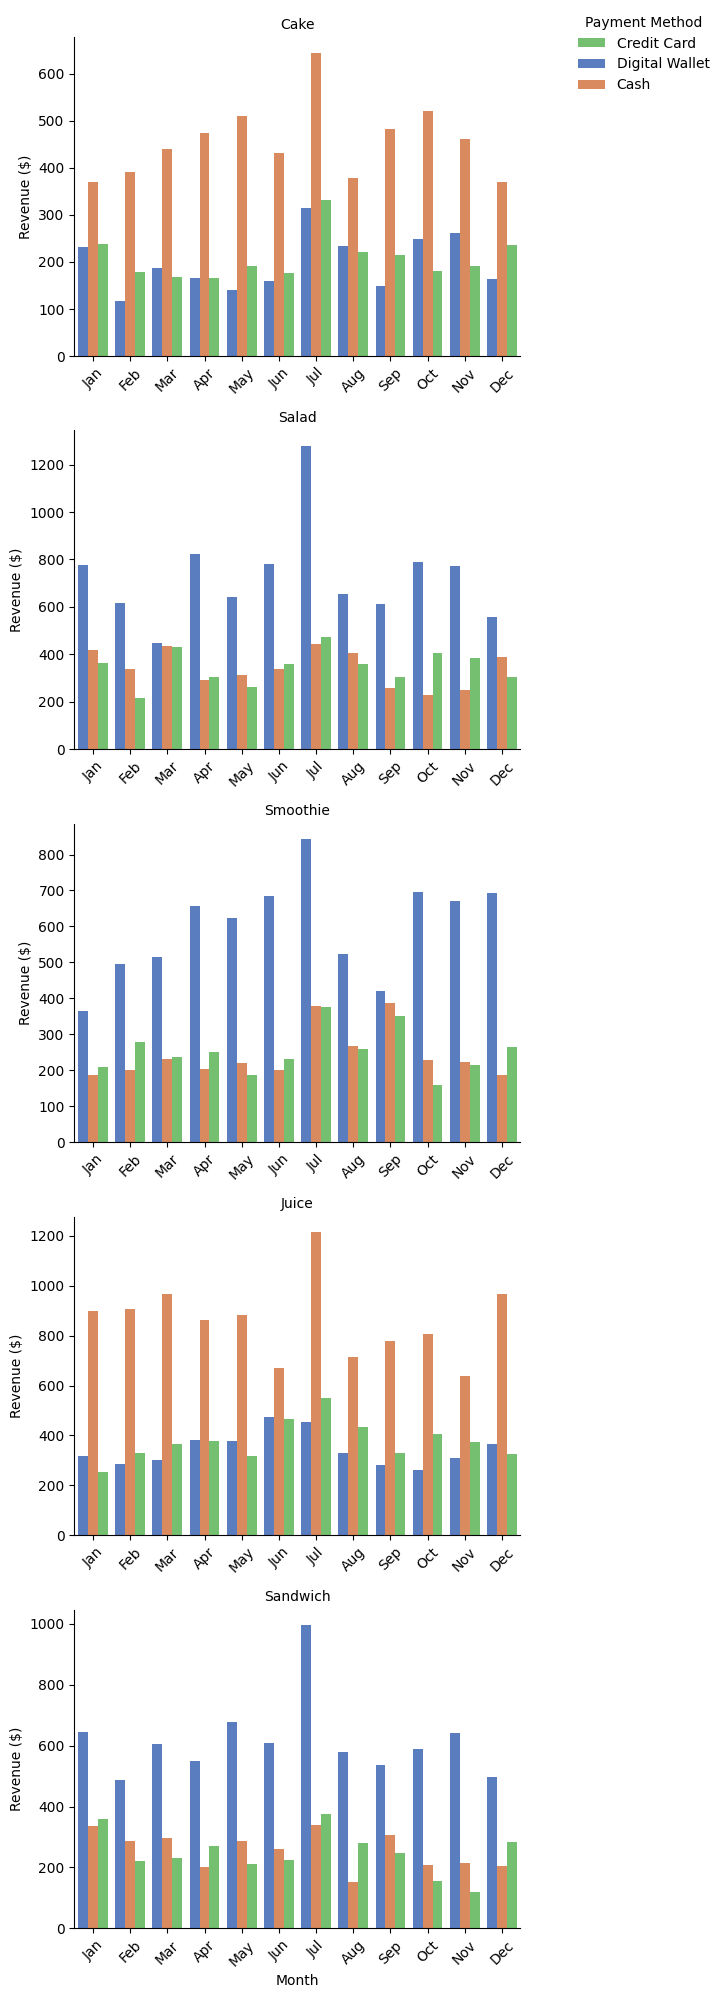

In [66]:
# Focus on top 5 revenue items
top_items = df.groupby('Item')['Total Spent'].sum().nlargest(5).index
df_top = df[df['Item'].isin(top_items)]

# FacetGrid with 5 rows and 1 column, and sharex=False
g = sns.FacetGrid(df_top, col='Item', col_wrap=1, height=4, sharey=False, sharex=False)

# Map barplot to each facet
# g.map(sns.barplot, 'Month', 'Total Spent', 'Payment Method', palette='muted', ci=None)
g.map(sns.barplot, 'Month', 'Total Spent', 'Payment Method', palette='muted', ci=None, estimator=sum)

# Add legend outside the plot
g.add_legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set titles and axis labels
g.set_titles('{col_name}')
g.set_axis_labels('Month', 'Revenue ($)')

# Month names for x-axis
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for ax in g.axes.flat:
    ax.set_xticks(range(0, 12))  # 0 to 11 for months
    ax.set_xticklabels(month_names, rotation=45)

plt.tight_layout()
plt.show()

Insight: Reveals seasonality + payment trends for bestsellers (e.g., Salad sales peak in summer with credit card payments).

### 4. New Multivariate Insight (Cross-Thematic)

#### Which combination of day, location, and payment method yields the highest average transaction value?

**Multivariate** : Heatmap of Average Transaction Value by Day, Location, and Payment Method

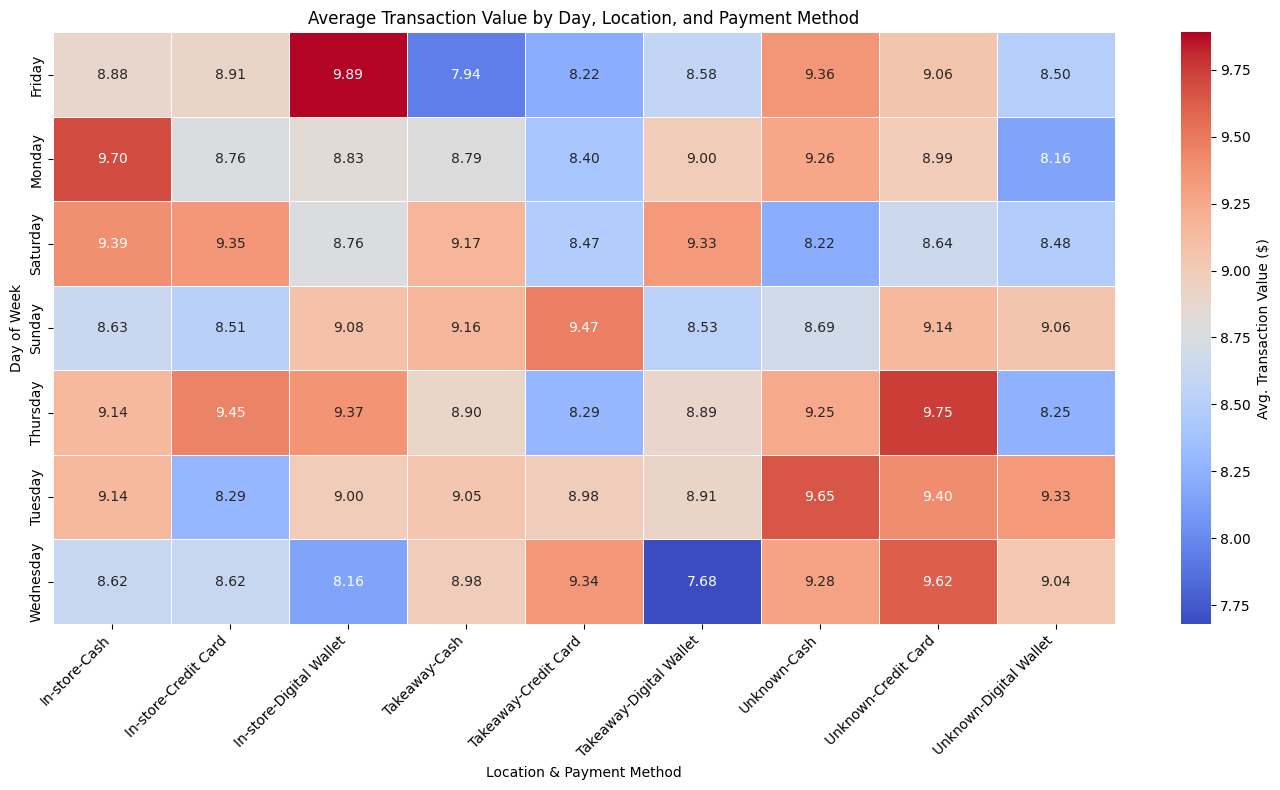

In [67]:
# Create a pivot table
pivot_table = df.pivot_table(
    values='Total Spent',
    index=['Day of Week'],
    columns=['Location', 'Payment Method'],
    aggfunc='mean'
).round(2)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Avg. Transaction Value ($)'})
plt.title('Average Transaction Value by Day, Location, and Payment Method')
plt.xlabel('Location & Payment Method')
plt.ylabel('Day of Week')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 Insight: Pinpoints optimal customer segments (e.g., high-value transactions occur on Saturdays via Digital Wallet for Takeaway orders).